# _**<span style="color:#1F618D;"> 🎓Breast Cancer Research🎓</span>**_

<span style="color:#148F77;">Author: Blaise Appolinary</span> [@Blaise](https://blaise-appolinary.netlify.app/)  

*Last Updated: 30/01/22*
******

<a id="table-of-contents"></a>
# **<span style="color:#1F618D;">📓 Table of Contents 📓</span>** 
- [1.😼 About author](#1)
- [2. Background](#2)
- [3. Objective](#3)
- [4. Data Cleaning and Preview](#4)
- [5. Machine Learning](#5)
- [6. Random Forest](#6)
- [7. K_Nearest_Neighbors](#7)
- [8. Support Vector Machines](#8)
- [9. Logistic Regression](#9)
- [10.Ensembling](#10)
- [11. Model Comparison](#11)


******

<a id="1"></a>
# <span style="color:#1F618D;">😼 About author</span>
My name is Blaise Appolinary, a Mathematics and Statistics student at the University of British Columbia. I love playing with datasets to gain insights from them.

<a id="2"></a>
# <span style="color:#1F618D;">Background</span>
Breast cancer is the second leading cause of death from cancer among Canadian women. The probability of a woman getting breast cancer in their lifetime in Canada is ⅛ and the probability that a woman dies from this disease is 1/34 according to the Canadian Cancer Society. This fatal disease occurs when normal breast cells grow and divide uncontrollably. This disease has five main subtypes: Luminar A, Luminar B, Triple-negative, HER2-enriched and Normal-like. 


<a id="3"></a>
# <span style="color:#1F618D;">Objective</span>
Our objective is to use machine learning approaches to classify breast cancer subtypes and identify the genes that play significant roles in classification. A predictive model can help speed up the process of identifying the cancer subtypes using gene expression data and improving the treatment options.



***Note: some results in this notebook may not match with the ones in the markdown cells. This notebook was initially ran in kaggle and, when using Anaconda, the numbers were a bit different. However, the differing results are not significant.***


In [20]:
import pandas as pd
import altair as alt


<a id="4"></a>
# <span style="color:#1F618D;">*Data Cleaning and preview*</span>


In [41]:
# READING IN GENETIC DATA
data = pd.read_csv("data\TCGA-BRCA.htseq_fpkm.tsv", sep="\t")

# READING CLINICAL DATA
clinical = pd.read_csv("data\clinical.tsv", sep="\t")

## <span style="color:#7E9FB8;">Preview of genetic sequencing data<span>

In [22]:
data.head()

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072


## <span style="color:#7E9FB8;">Preview of Clinical Data<span>

In [23]:
clinical.head()

,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,Invasive Breast Carcinoma,Female,BRCA_Her2,Infiltrating Ductal Carcinoma
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Counts of Samples per Subtype<span>

In [24]:
clinical_summary= clinical.groupby("Subtype").size().rename("Count").reset_index()
clinical_summary

,Subtype,Count
0,BRCA_Basal,171
1,BRCA_Her2,78
2,BRCA_LumA,499
3,BRCA_LumB,197
4,BRCA_Normal,36


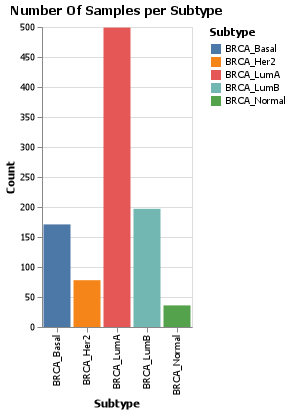

In [34]:
alt.renderers.enable("png")
alt.Chart(clinical_summary).mark_bar().encode(
    alt.X("Subtype"),
    alt.Y("Count"),
    color= "Subtype",
    tooltip= ["Subtype", "Count"]
).properties(
    title="Number Of Samples per Subtype",
    width=150,
    height=300
)

<a id="4"></a>
## <span style="color:#7E9FB8;">*Transposing Genetic Sequencing Data*</span>

In order to perform some modelling on the data, we need the genes as columns. The cell below transposes the data and previews the head of the dataset.
 

In [42]:
transposed = data.set_index(
    'Ensembl_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"Ensembl_ID"})
transposed.head()


,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,...,0.0,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,...,0.0,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,...,0.0,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,TCGA-A8-A06X-01A,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,...,0.0,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,TCGA-E2-A14T-01A,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,...,0.0,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0


## <span style="color:#7E9FB8;">Cleaning Up Clinical Data</span>
The following were performed on the clinical data in the following cell to prepare it for Merging with the genetic sequencing data
- renamed `Sample ID` to `Ensemble_Id`
- Added "A" at the end of the string in the `Ensembl_ID` column

In [43]:
clinical= clinical.rename(columns={"Sample ID": "Ensembl_ID"})
clinical.Ensembl_ID+="A"
clinical.head()

,Patient ID,Ensembl_ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,Invasive Breast Carcinoma,Female,BRCA_Her2,Infiltrating Ductal Carcinoma
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A,62,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Merging Clinical Data With Gene Expression Data</span>

In [44]:
# MERGING CLINICAL DATA AND GENE EXPRESSION DATA
final_data = pd.merge(transposed,
    clinical,
    how="inner",
    on="Ensembl_ID")
final_data.head()

,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3,Patient ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,...,0.285640,0.0,0.599579,0.0,TCGA-E9-A1NI,51,Invasive Breast Carcinoma,Female,BRCA_LumB,Mixed Histology (NOS)
1,TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,...,0.115149,0.0,1.382192,0.0,TCGA-A1-A0SP,40,Invasive Breast Carcinoma,Female,BRCA_Basal,Infiltrating Ductal Carcinoma
2,TCGA-A8-A06X-01A,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,...,0.345883,0.0,0.396315,0.0,TCGA-A8-A06X,77,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-E2-A14T-01A,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,...,0.065679,0.0,0.157504,0.0,TCGA-E2-A14T,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-AC-A8OS-01A,0.354334,0.000000,2.397119,0.0,1.792870,3.556193,0.0,0.037629,6.474977,...,0.837305,0.0,0.662529,0.0,TCGA-AC-A8OS,71,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Keeping Only The Subtype And The Gene Expression Data</span>

In [45]:
df = final_data.drop(columns=["Ensembl_ID", "Patient ID", 
                              "Diagnosis Age","Cancer Type",
                              "Sex", "Tumor Type"]).set_index("Subtype").reset_index().dropna()
df.head()

,Subtype,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,BRCA_LumB,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,...,0.0,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,BRCA_Basal,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,...,0.0,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,BRCA_LumB,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,...,0.0,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
3,BRCA_LumA,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,...,0.0,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0
4,BRCA_LumA,0.354334,0.000000,2.397119,0.0,1.792870,3.556193,0.0,0.037629,6.474977,...,0.0,0.062172,0.0,0.578244,0.065433,3.935869,0.837305,0.0,0.662529,0.0


## <span style="color:#7E9FB8;">Subtype Samples Counts of The Final Cleaned Dataset</span>

In [46]:
df.groupby("Subtype").size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Basal,168
1,BRCA_Her2,77
2,BRCA_LumA,490
3,BRCA_LumB,192
4,BRCA_Normal,35


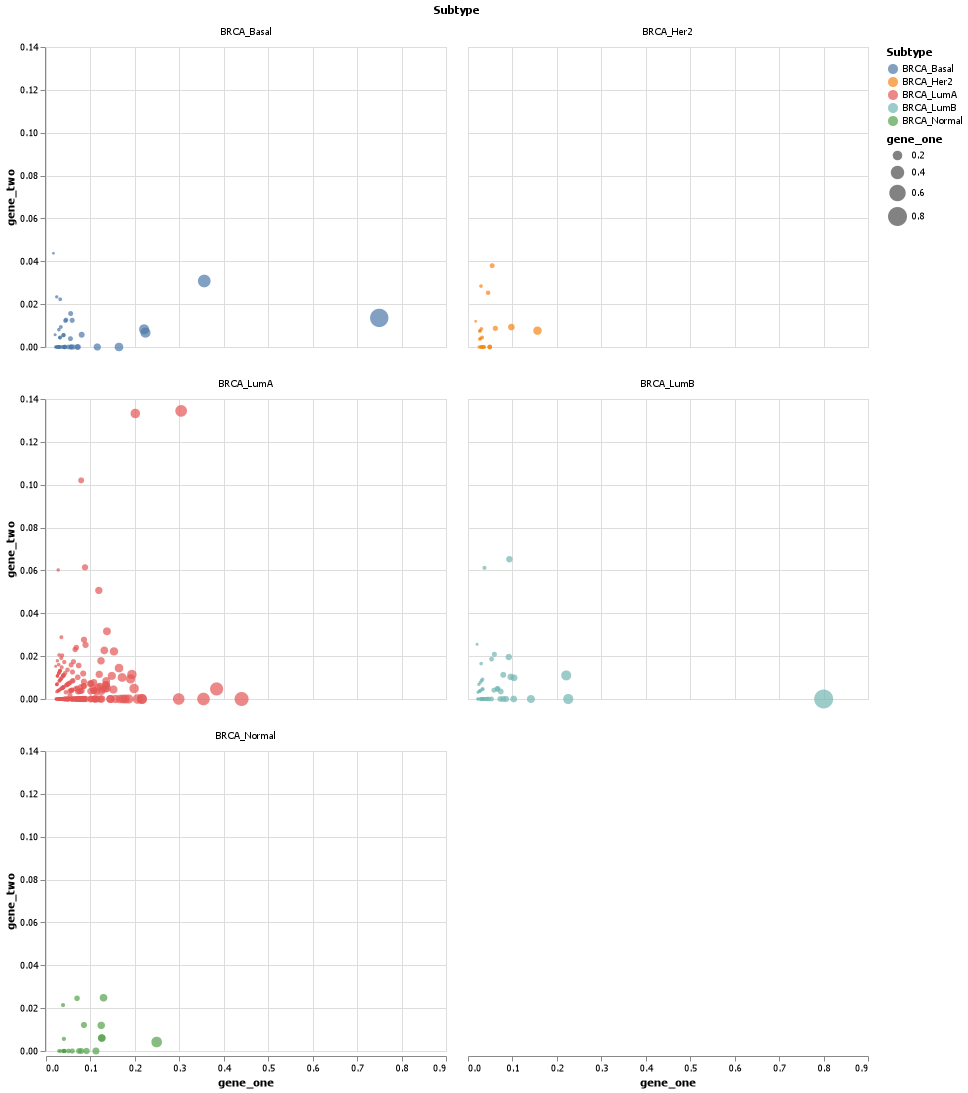

In [47]:
to_plot = df[["Subtype", "ENSG00000242268.2", "ENSG00000270112.3"]]
to_plot.columns= ['Subtype', 'gene_one', 'gene_two']

alt.Chart(to_plot).mark_circle().encode(
    alt.X("gene_one", scale= alt.Scale(zero=False)),
    alt.Y("gene_two", scale= alt.Scale(zero=False)), 
    color= "Subtype",
    size= "gene_one"
).facet(
    facet="Subtype",
    columns=2
)


<a id="5"></a>
# <span style="color:#1F618D;">*Machine Learning Models*</span>

In [48]:
y = df.Subtype
X = df.drop("Subtype", axis=1)

## <span style="color:#7E9FB8;">Splitting Data Into Training And Testing Sets</span>

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

<a id="6"></a>
# <span style="color:#1F618D;">Random Forest</span>

## <span style="color:#7E9FB8;">Choosing the optimal muximum tree depth from range 1 to 20</span>

In [50]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score

max_depth_best = []
for i in range(1, 20):
    clf = rf(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    max_depth_best.append([i, accuracy_score(y_test, y_pred)])
max_depth = pd.DataFrame(max_depth_best, columns=["max_depth", "Accuracy"])
max_depth

,max_depth,Accuracy
0,1,0.704663
1,2,0.740933
2,3,0.803109
3,4,0.834197
4,5,0.839378
5,6,0.839378
6,7,0.860104
7,8,0.865285
8,9,0.865285
9,10,0.860104


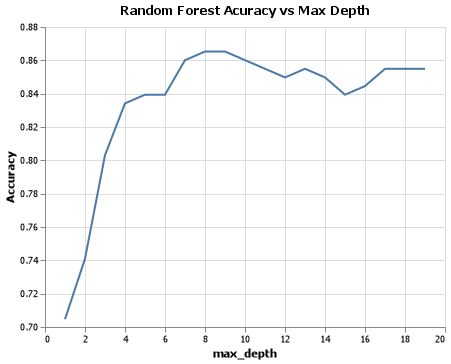

In [51]:
max_depth_chart = alt.Chart(max_depth).mark_line().encode(
    alt.X("max_depth", scale=alt.Scale(zero=False)),
    alt.Y("Accuracy", scale=alt.Scale(zero=False)),
    tooltip=["max_depth", "Accuracy"]
).properties(
    title="Random Forest Acuracy vs Max Depth"
)
max_depth_chart

In the output above, we see that in the range the best level of depth of trees that bring the best output is 10, 11 and 12. therefore, we will train our model with the max_depth parameter =  10

## <span style="color:#7E9FB8;">Choosing the Optimal n_estimators from range (10,200)</span>

In [52]:
# FINDING THE BEST N_ESTIMATOR
n_estimators = []
for i in range(10, 200):
    clf = rf(max_depth=10, n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    n_estimators.append([i, accuracy_score(y_test, y_pred)])

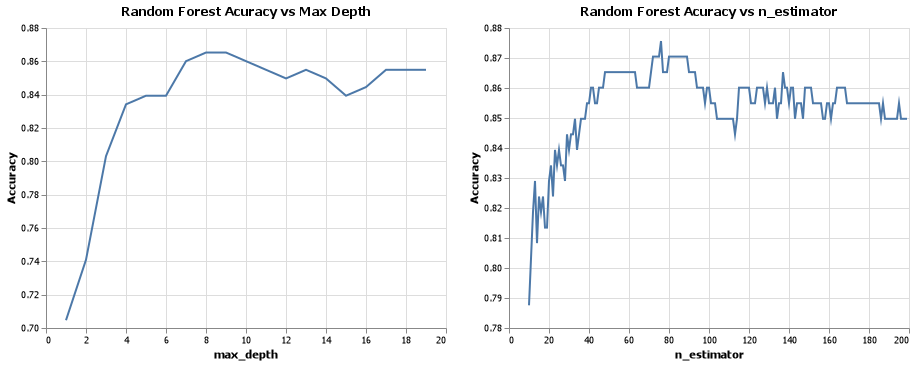

In [53]:
n_estimate = pd.DataFrame(n_estimators, columns=["n_estimator", "Accuracy"])
estimate_chart = alt.Chart(n_estimate).mark_line().encode(
    alt.X("n_estimator", scale=alt.Scale(zero=False)),
    alt.Y("Accuracy", scale=alt.Scale(zero=False)),
    tooltip=['n_estimator', "Accuracy"]
).properties(
    title="Random Forest Acuracy vs n_estimator"
)
max_depth_chart | estimate_chart

In [54]:
# The Optimal n_estimator
n_estimate.loc[n_estimate["Accuracy"].idxmax()]

n_estimator    76.000000
Accuracy        0.875648
Name: 66, dtype: float64

From the series above, we see that 0.865 is the highest score and the best n_estimator is 99. 

## <span style="color:#7E9FB8;">Training the random Forest Model With The Hyperparameters Obtained Above</span>

In [55]:
rf_model = rf(max_depth=10, n_estimators=99, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting on Testing Set

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8601036269430051

## <span style="color:#7E9FB8;">Random Forest Classifier Confusion Matrix</span>

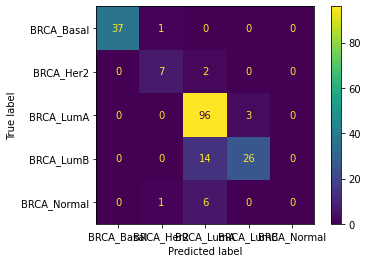

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
ConfusionMatrixDisplay(conf_mat, display_labels=rf_model.classes_).plot()

## <span style="color:#7E9FB8;">Random Forest Observations</span>
- The model is terrible with predicting `BRCA_Normal`. This makes sence given that we have very few samples of this subtype.
- The model is having problems with sepparating between `BRCA_LumA` and `BRCA_LumB`

## <span style="color:#7E9FB8;">Feature Importances</span>

Having built the Random Forest Model, we will now look at the most important genes in the classification of our gene subtypes. Since there are many genes in the model, we will only look at the 10 most important ones. 

In [57]:
sorted_idx = (-rf_model.feature_importances_).argsort()[:10]
feature_data = pd.DataFrame({"Feature": X.columns[sorted_idx], "Importance":  rf_model.feature_importances_[
                            sorted_idx]}).sort_values(by="Importance", ascending=False)
feature_data

,Feature,Importance
0,ENSG00000245750.6,0.010655
1,ENSG00000138180.14,0.007881
2,ENSG00000118307.17,0.006408
3,ENSG00000139865.15,0.005974
4,ENSG00000157456.6,0.005928
5,ENSG00000164893.7,0.005025
6,ENSG00000145386.8,0.004781
7,ENSG00000089685.13,0.004680
8,ENSG00000105173.12,0.004554
9,ENSG00000117399.12,0.004467


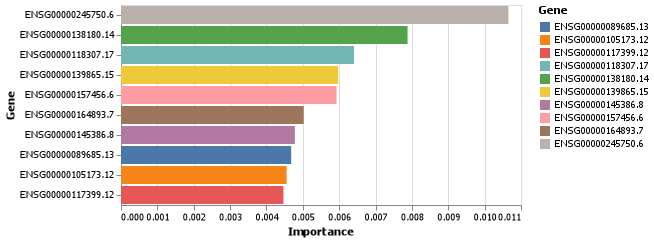

In [58]:
alt.Chart(feature_data).mark_bar().encode(
    y=alt.Y("Feature", sort=alt.EncodingSortField(
        field="Importance", op="count", order='ascending'), title="Gene"),
    x=alt.X('Importance:Q'),
    color=alt.Color("Feature", title="Gene"),
    tooltip=["Feature", "Importance"]
)

<a id="7"></a>
# <span style="color:#1F618D;">K Nearest Neighbors Model</span>

## <span style="color:#7E9FB8;">Finding The Optimal Number of Neighbors in The Range (1,20) </span>

In [59]:
from sklearn.neighbors import KNeighborsClassifier as knn

neighbors = []

for i in range(1, 20):
    kclass = knn(n_neighbors=i)
    kclass.fit(X_train, y_train)
    y_pred = kclass.predict(X_test)
    neighbors.append([i, accuracy_score(y_test, y_pred)])
neighbors = pd.DataFrame(neighbors, columns=["n_neighbors", "Accuracy"])
neighbors.head()

,n_neighbors,Accuracy
0,1,0.829016
1,2,0.834197
2,3,0.818653
3,4,0.803109
4,5,0.844560


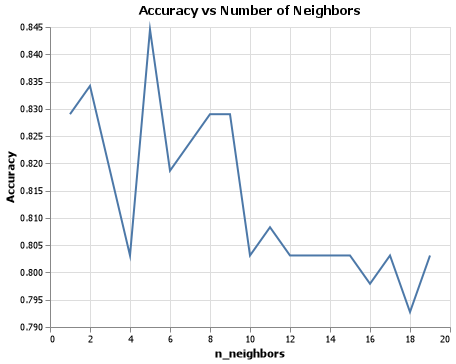

In [60]:
alt.Chart(neighbors).mark_line().encode(
    alt.X("n_neighbors", scale=alt.Scale(zero=False)),
    alt.Y("Accuracy", scale=alt.Scale(zero=False)),
    tooltip=["Accuracy", "n_neighbors"]
).properties(
    title="Accuracy vs Number of Neighbors"
)

In the neighbors above, we see that the number of neighbors in the range(1,10) best for our model is 3. Since this model has a way much lower performance than Random Forest, we will not use it. 

<a id="8"></a>
# <span style="color:#1F618D;">Support Vector Machines Model</span>

## <span style="color:#7E9FB8;">Finding The Optimal C Parameter </span>

In [61]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_class = []
for i in range(1, 10):
    clf = make_pipeline(StandardScaler(), SVC(C=i))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    svm_class.append([i, accuracy_score(y_test, y_pred)])
svm_class = pd.DataFrame(svm_class, columns=["C parameter", "Accuracy"])
svm_class.head()

,C parameter,Accuracy
0,1,0.756477
1,2,0.761658
2,3,0.761658
3,4,0.766839
4,5,0.766839


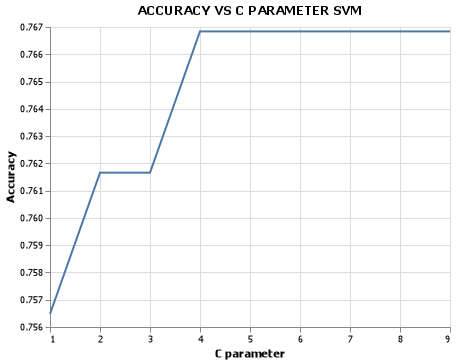

In [62]:
alt.Chart(svm_class).mark_line().encode(
    alt.X("C parameter", scale=alt.Scale(zero=False)),
    alt.Y("Accuracy", scale=alt.Scale(zero=False))
).properties(
    title="ACCURACY VS C PARAMETER SVM"
)

Here, we see that the best C is 2

## <span style="color:#7E9FB8;">Training SVM and Obtaining Confusion Matrix </span>

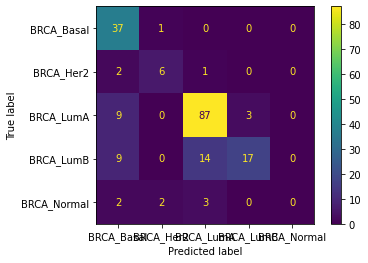

In [63]:
svm_model = make_pipeline(StandardScaler(), SVC(C=2))

# Fitting Model
svm_model.fit(X_train, y_train)

# Obtaining prediction
y_pred_svm = svm_model.predict(X_test)

# Getting the Confusion Matrix
svm_conf_mat = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
ConfusionMatrixDisplay(svm_conf_mat, display_labels=svm_model.classes_).plot()

## <span style="color:#7E9FB8;"> SVM Observations </span>
- The matrix shows that this model is just simply worse than the random forest model in any subtype classiffication 

<a id="9"></a>
# <span style="color:#1F618D;">Logistic Regression Model</span>

## <span style="color:#7E9FB8;"> Training Logistic Regression </span>

In [64]:
from sklearn.linear_model import LogisticRegression


log_class = make_pipeline(StandardScaler(), LogisticRegression(
    random_state=0, solver="saga", max_iter=200))
log_class.fit(X_train, y_train)
log_class.score(X_test, y_test)

C:\Users\blais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8652849740932642

## <span style="color:#7E9FB8;">LogRegression Confusion Matrix<span>

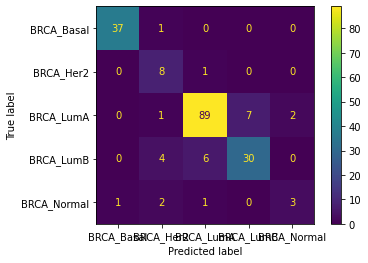

In [65]:
y_pred_log = log_class.predict(X_test)
log_conf_mat = confusion_matrix(y_test, y_pred_log, labels=log_class.classes_)
ConfusionMatrixDisplay(log_conf_mat, display_labels=log_class.classes_).plot()

## <span style="color:#7E9FB8;">LogRegression Observation<span>
- It performs second to Random Forest. 
- It also have a hard time classifying `BRCA_LumA` and `BRCA_lumB` and `BRCA_Normal`

<a id="10"></a>
# <span style="color:#1F618D;">Ensembling The Models</span>

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_clf = RandomForestClassifier(max_depth=10, random_state=0)
svm_clf = make_pipeline(StandardScaler(), SVC(C=2))
log_clf = make_pipeline(StandardScaler(), LogisticRegression(
    random_state=0, solver="saga", max_iter=200))

ensembl_clf = VotingClassifier(
    estimators=[("rf", rf_clf), ("log", log_clf)],
    voting="hard"
)

In [67]:
ensembl_clf.fit(X_train, y_train)

C:\Users\blais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=0)),
                             ('log',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=200,
                                                                  random_state=0,
                                                                  solver='saga'))]))])

In [68]:
ensembl_clf.score(X_test, y_test)

0.8601036269430051

Unfortunately, even though the ensemble has a good accuracy rate, it does not outperform the best model, random forest

<a id="11"></a>
# <span style="color:#1F618D;">Comparison of the models</span>

In [69]:
model_scores = [rf_model.score(X_test, y_test),
                svm_model.score(X_test, y_test),
                log_class.score(X_test, y_test),
                ensembl_clf.score(X_test, y_test)]
models = pd.DataFrame({"Model": ["Random Forest", "SVM", "Logistic", "Ensemble"],
                       "Accuracy": model_scores})
models

,Model,Accuracy
0,Random Forest,0.860104
1,SVM,0.761658
2,Logistic,0.865285
3,Ensemble,0.860104


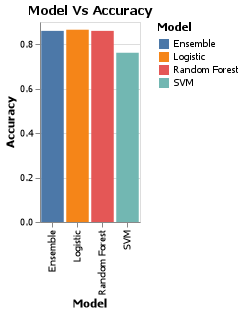

In [70]:
alt.Chart(models).mark_bar().encode(
    x="Model",
    y="Accuracy",
    color="Model",
    tooltip=["Model", "Accuracy"]
).properties(
    title="Model Vs Accuracy",
    width=100,
    height=200
)

# Logistic Regression Won!!
With a whooping 86.5% accuracy